## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import keras

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
  x = x / 255.
  if flatten:
      x = x.reshape((len(x), -1))
  return x

def preproc_y(y, num_classes=10):
  if y.shape[-1] == 1:
      y = keras.utils.to_categorical(y, num_classes)
  return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, out_unit=10, num_neuron=[512, 256, 128]):
  """Code Here
  建立你的神經網路
  """
  input_layer = keras.layers.Input(input_shape)

  for i, num in enumerate(num_neuron):
    if i == 0:
      x = keras.layers.Dense(
          units=num, activation='relu', name=f'hidden_layer_{i+1}')(input_layer)
      x = keras.layers.BatchNormalization()(x)

    else:
      x = keras.layers.Dense(
          units=num, activation='relu', name=f'hidden_layer_{i+1}')(x)
      x = keras.layers.BatchNormalization()(x)
  
  out = keras.layers.Dense(units=out_unit, activation='softmax', name='out_layer')(x)
  model = keras.models.Model(inputs=input_layer, outputs=out)

  return model

## 比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95



In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for i in BATCH_SIZE:
  keras.backend.clear_session()
  print(f'EXP: [BATCH_SIZE - {i}]')


  model = build_mlp(x_train.shape[-1])
  optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

  model.summary()

  model.fit(
      x_train,
      y_train,
      batch_size=i,
      epochs=EPOCHS,
      validation_data=(x_test, y_test),
      shuffle=True)

  train_loss = model.history.history["loss"]
  valid_loss = model.history.history["val_loss"]
  train_acc = model.history.history["accuracy"]
  valid_acc = model.history.history["val_accuracy"]

  name_tag = f'BATCH_SIZE_{i}'
  results[name_tag] = {
      'train_loss': train_loss,
      'valid_loss': valid_loss,
      'train_acc': train_acc,
      'valid_acc': valid_acc}

EXP: [BATCH_SIZE - 2]
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128

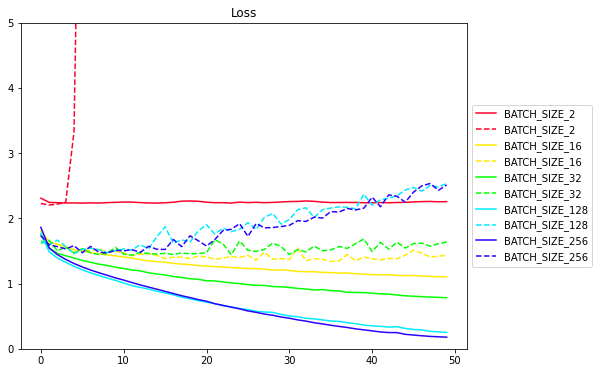

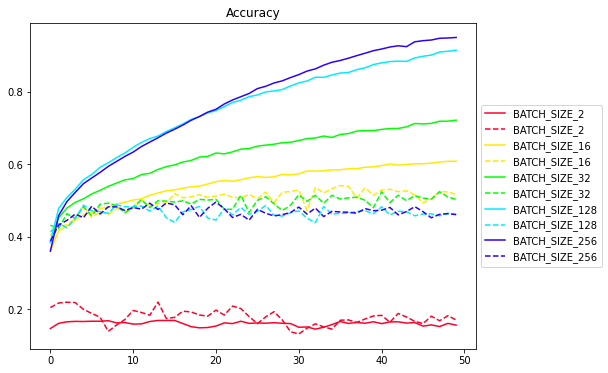

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""


NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]


plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim([0,5])
plt.title("Loss")
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Accuracy")
plt.show()

## 請嘗試將 BN 放在 Activation 之前，並比較訓練結果

In [9]:
def build_mlp_2(input_shape, out_unit=10, num_neuron=[512, 256, 128]):
  """Code Here
  建立你的神經網路
  """
  input_layer = keras.layers.Input(input_shape)

  for i, num in enumerate(num_neuron):
    if i == 0:      
      x = keras.layers.Dense(
          units=num, name=f'hidden_layer_{i+1}')(input_layer)
      x = keras.layers.BatchNormalization()(x)
      x = keras.layers.Activation('relu')(x)
      

    else:
      x = keras.layers.BatchNormalization()(x)
      x = keras.layers.Dense(
          units=num, name=f'hidden_layer_{i+1}')(x)
      x = keras.layers.BatchNormalization()(x)
      x = keras.layers.Activation('relu')(x)
      
  
  out = keras.layers.Dense(units=out_unit, activation='softmax', name='out_layer')(x)
  model = keras.models.Model(inputs=input_layer, outputs=out)

  return model

In [10]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [11]:
results_2 = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for i in BATCH_SIZE:
  keras.backend.clear_session()
  print(f'EXP: [BATCH_SIZE - {i}]')


  model = build_mlp_2(x_train.shape[-1])
  optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

  model.summary()

  model.fit(
      x_train,
      y_train,
      batch_size=i,
      epochs=EPOCHS,
      validation_data=(x_test, y_test),
      shuffle=True)

  train_loss = model.history.history["loss"]
  valid_loss = model.history.history["val_loss"]
  train_acc = model.history.history["accuracy"]
  valid_acc = model.history.history["val_accuracy"]

  name_tag = f'BATCH_SIZE_{i}'
  results_2[name_tag] = {
      'train_loss': train_loss,
      'valid_loss': valid_loss,
      'train_acc': train_acc,
      'valid_acc': valid_acc}

EXP: [BATCH_SIZE - 2]
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256

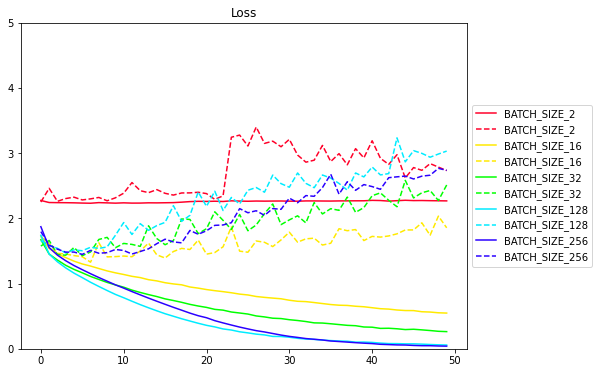

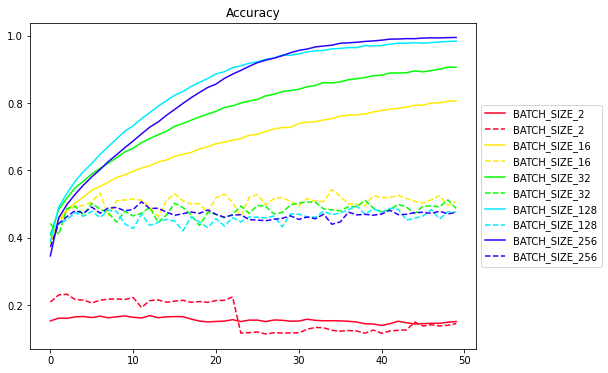

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""


NUM_COLORS = len(results_2.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]


plt.figure(figsize=(8,6))
for i, cond in enumerate(results_2.keys()):
    plt.plot(range(len(results_2[cond]['train_loss'])),results_2[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_2[cond]['valid_loss'])),results_2[cond]['valid_loss'], '--', label=cond, color=color_bar[i])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim([0,5])
plt.title("Loss")
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_2.keys()):
    plt.plot(range(len(results_2[cond]['train_acc'])),results_2[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_2[cond]['valid_acc'])),results_2[cond]['valid_acc'], '--', label=cond, color=color_bar[i])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Accuracy")
plt.show()

## 請於 BN 放在 Input Layer 後

In [13]:
def build_mlp_3(input_shape, out_unit=10, num_neuron=[512, 256, 128]):
  """Code Here
  建立你的神經網路
  """
  input_layer = keras.layers.Input(input_shape)
  x = keras.layers.BatchNormalization()(input_layer)
  for i, num in enumerate(num_neuron):
    if i == 0:
      
      x = keras.layers.Dense(
          units=num, activation='relu', name=f'hidden_layer_{i+1}')(x)
      

    else:
      
      x = keras.layers.Dense(
          units=num, activation='relu', name=f'hidden_layer_{i+1}')(x)
      
  
  out = keras.layers.Dense(units=out_unit, activation='softmax', name='out_layer')(x)
  model = keras.models.Model(inputs=input_layer, outputs=out)

  return model

In [14]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [15]:
results_3 = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for i in BATCH_SIZE:
  keras.backend.clear_session()
  print(f'EXP: [BATCH_SIZE - {i}]')


  model = build_mlp_3(x_train.shape[-1])
  optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

  model.summary()

  model.fit(
      x_train,
      y_train,
      batch_size=i,
      epochs=EPOCHS,
      validation_data=(x_test, y_test),
      shuffle=True)

  train_loss = model.history.history["loss"]
  valid_loss = model.history.history["val_loss"]
  train_acc = model.history.history["accuracy"]
  valid_acc = model.history.history["val_accuracy"]

  name_tag = f'BATCH_SIZE_{i}'
  results_3[name_tag] = {
      'train_loss': train_loss,
      'valid_loss': valid_loss,
      'train_acc': train_acc,
      'valid_acc': valid_acc}

EXP: [BATCH_SIZE - 2]
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3072)              12288     
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 512)               1573376   
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 256)               131328    
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 128)               32896     
_________________________________________________________________
out_layer (Dense)            (None, 10)                1290      
Total params: 1,751,178
Trainable params: 1,745,034
Non-trainable params: 6,144
_________________________

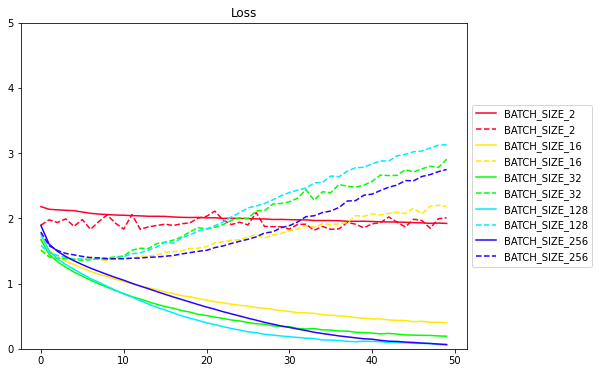

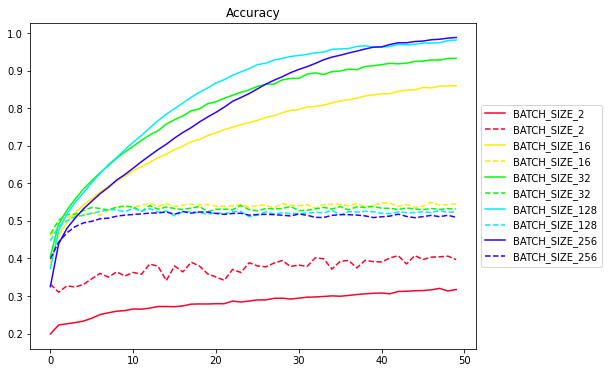

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""


NUM_COLORS = len(results_3.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]


plt.figure(figsize=(8,6))
for i, cond in enumerate(results_3.keys()):
    plt.plot(range(len(results_3[cond]['train_loss'])),results_3[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_3[cond]['valid_loss'])),results_3[cond]['valid_loss'], '--', label=cond, color=color_bar[i])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim([0,5])
plt.title("Loss")
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_3.keys()):
    plt.plot(range(len(results_3[cond]['train_acc'])),results_3[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_3[cond]['valid_acc'])),results_3[cond]['valid_acc'], '--', label=cond, color=color_bar[i])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Accuracy")
plt.show()